In [340]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

Исследуем, как распределены преступления различных типов в разные дни недели в деловом центре города (Манхэттен) и в одном из самых тихих районов (Staten Island)

In [344]:
data = pd.read_csv('NYPD_7_Major_Felony_Incident_Map.csv')

manhattan_slice = data[(data["Occurrence Year"] == 2015) &
              (data["Borough"] == "MANHATTAN")]

island_slice = data[(data["Occurrence Year"] == 2015) &
              (data["Borough"] == "STATEN ISLAND")]

manhattan_slice = manhattan_slice[["Day of Week", "Offense"]]
island_slice = island_slice[["Day of Week", "Offense"]]
island_slice.head()

,Day of Week,Offense
713947,Friday,FELONY ASSAULT
713959,Friday,GRAND LARCENY
714909,Friday,BURGLARY
715544,Friday,GRAND LARCENY OF MOTOR VEHICLE
716830,Friday,GRAND LARCENY


In [404]:
manhattan_slice["count"] = 1
island_slice["count"] = 1

manhattan = manhattan_slice.groupby(["Day of Week", "Offense"]).count()["count"]
island = island_slice.groupby(["Day of Week", "Offense"]).count()["count"]

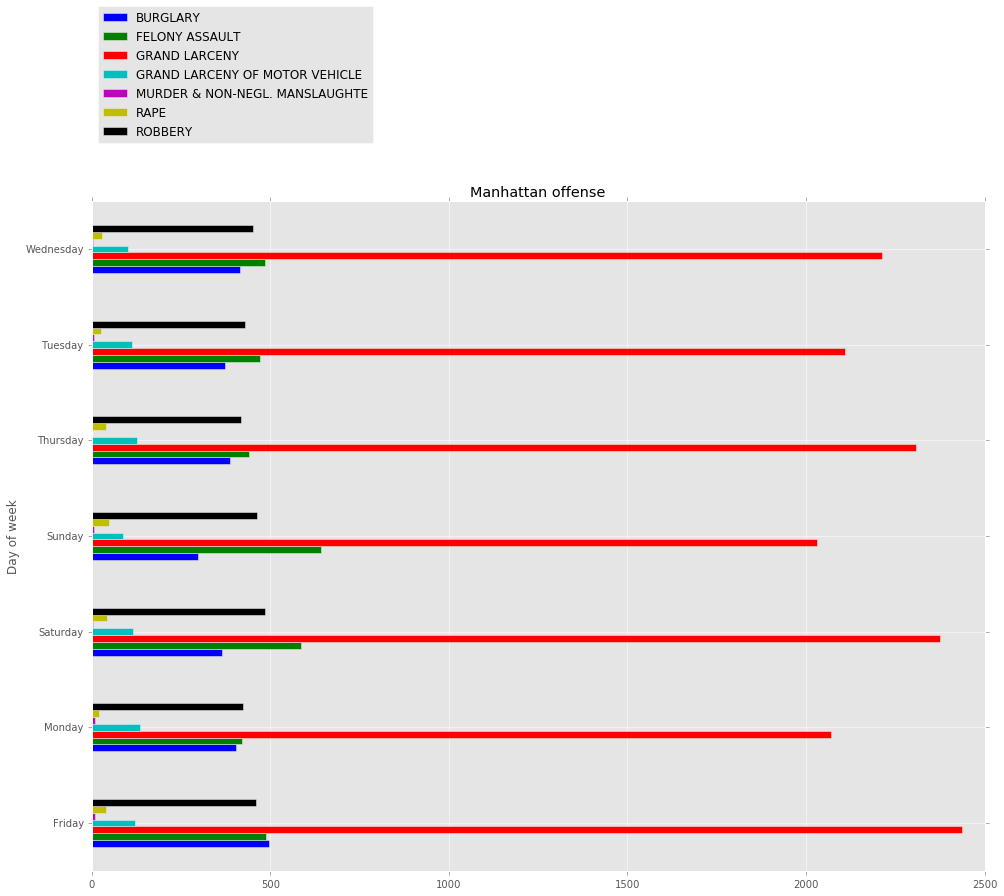

In [413]:
f1 = plt.figure(figsize=(16,12))
plt.title('Manhattan offense', color='black')

m_us = manhattan.unstack().fillna(0)
m_us.index.name = "Day of week"
m_us.plot(kind='barh', ax=f1.gca())
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.3))
plt.show()

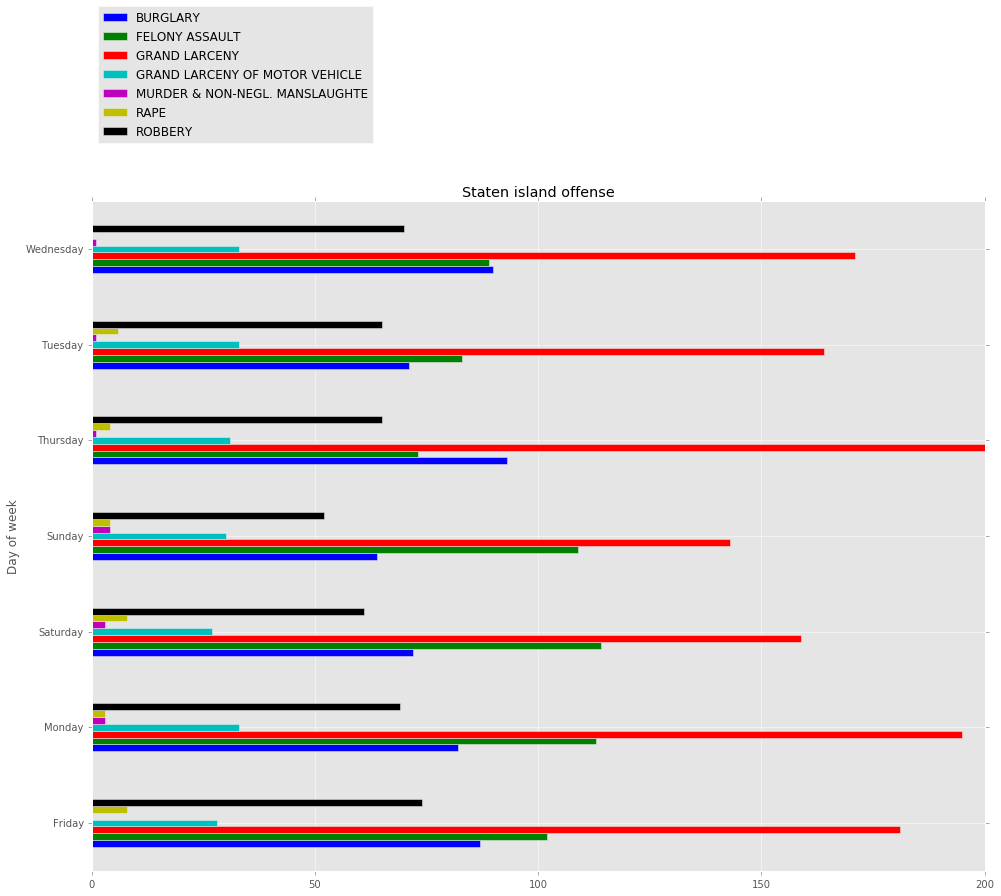

In [414]:
f = plt.figure(figsize=(16,12))
plt.title('Staten island offense', color='black')

i_us = island.unstack().fillna(0)
i_us.index.name = "Day of week"
i_us.plot(kind='barh', ax=f.gca())
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.3))
plt.show()

Видим, что:
1. На Манхэттене общий уровень преступности на порядок выше с явным преобладаем краж.
2. Налеты (felony assault) на Манхэттене совершаются по выходным чаще.
3. В Стейтен айленде относительная доля угонов автомобилей выше, чем на Манхэттене (по отношению ко всем типам преступлений).
4. По воскресеньям в Стейтен айленде совершается немного меньше преступлений, чем в остальные дни недели.

Теперь посмотрим, какие преступления совершаются в различных районах Нью-Йорка

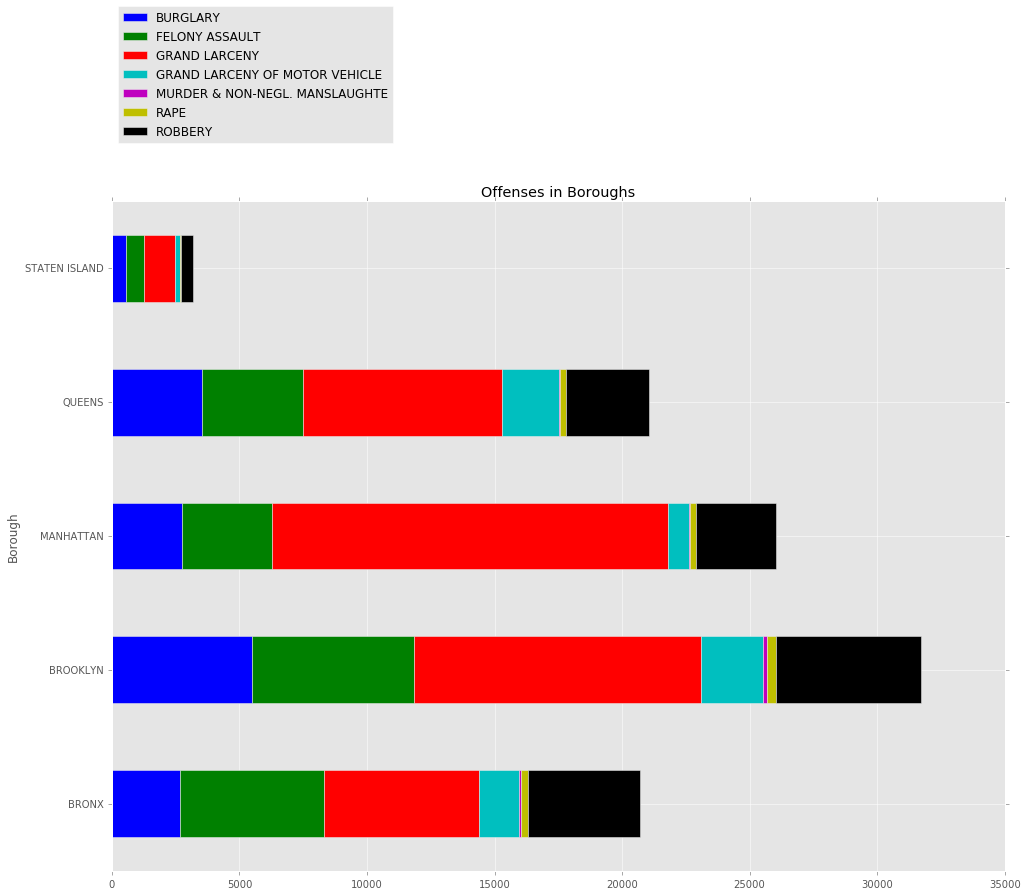

In [400]:
last_slice = data[data["Occurrence Year"] == 2015]
grouped = last_slice.groupby(["Borough", "Offense"]).count()
grouped = grouped["Identifier"]
grouped = grouped.unstack()

f2 = plt.figure(figsize=(16,12))
plt.title('Offenses in Boroughs', color='black')

#grouped.index.name = "Day of week"
grouped.plot(kind='barh', stacked=True, ax=f2.gca())
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.3))
plt.show()

Выводы:

1. Ограбления и кражи со взломом наиболее характерны для Бруклина и Бронкса.
2. Бруклин лидирует как по общему числу преступлений, так и по доле убийств. Является наиболее опасным районом.
3. По числу краж лидирует Манхэттен.

Исследуем влияние финансового кризиса на криминогенную обстановку

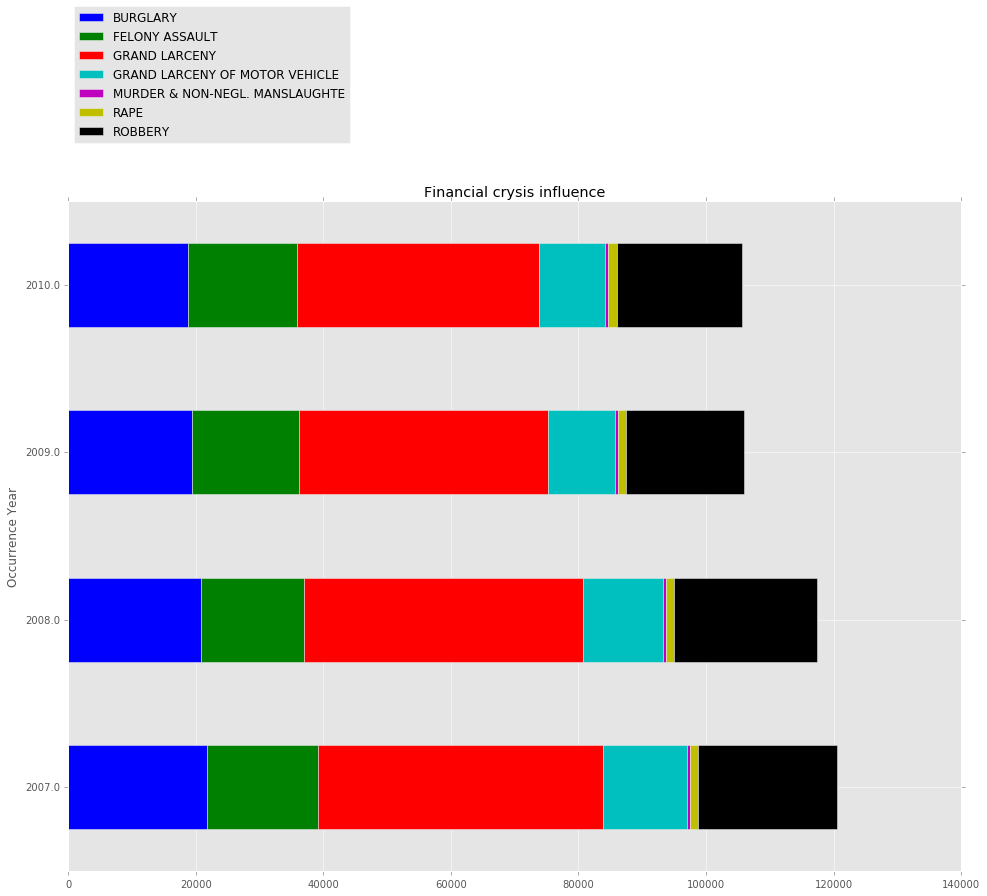

In [412]:
slice_crysis = data[(data["Occurrence Year"] >= 2007) &
                    (data["Occurrence Year"] <= 2010)]
grouped_crs = slice_crysis.groupby(["Occurrence Year", "Offense"]).count()
grouped_crs = grouped_crs["Identifier"]
grouped_crs = grouped_crs.unstack()

f2 = plt.figure(figsize=(16,12))
plt.title('Financial crysis influence', color='black')

grouped_crs.plot(kind='barh', stacked=True, ax=f2.gca())
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.3))
plt.show()

Заметного влияния не выявлено. Разве что, в 2009-2010 годах число преступлений не снизилось.